# GRIP - The Sparks Foundation

# Data Science & Business Analytics Intern

# Written by : S.Harsha Vardhan

# Task 1: Prediction Using Supervised ML

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model

In [2]:
df=pd.read_csv("http://bit.ly/w-data")
print("Data is working perfectly")
df

Data is coming correctly


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

In [14]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.groupby(['Hours'])['Scores'].mean()

Hours
1.1    17.0
1.5    20.0
1.9    24.0
2.5    25.5
2.7    27.5
3.2    27.0
3.3    42.0
3.5    30.0
3.8    35.0
4.5    41.0
4.8    54.0
5.1    47.0
5.5    60.0
5.9    62.0
6.1    67.0
6.9    76.0
7.4    69.0
7.7    85.0
7.8    86.0
8.3    81.0
8.5    75.0
8.9    95.0
9.2    88.0
Name: Scores, dtype: float64

# Exploring the Dataset

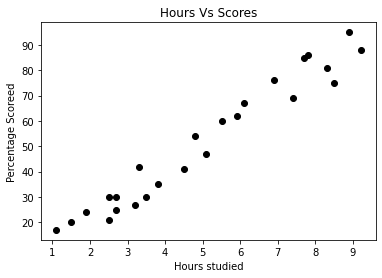

In [20]:
plt.scatter(df['Hours'], df['Scores'], color='Black',marker='o')
plt.title("Hours Vs Scores")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scoreed")
plt.show()

In [21]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Dividing the data into attributes(inputs) and labels (outputs)

In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [25]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [27]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the dataset into the Training set and Test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Training The Model

In [29]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression()

In [30]:
#REGRESSORS PREDICTION OVER THE RANGE OF DATA  USING LINSPACE()
pred=np.linspace(min(X),max(X)).reshape(-1,1)

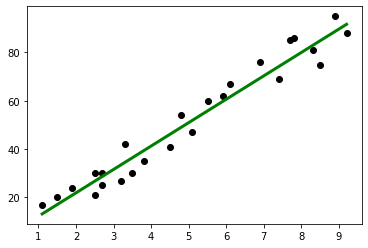

In [34]:
plt.scatter(X,y,color='black')
plt.plot(pred,reg.predict(pred),color='green',linewidth=3)
plt.show()

In [35]:
#TO CHECK THE ACCURACY OF THE MODEL WE USE THE SCORE() METHOD 
acc=reg.score(X_test,y_test)
print("The accuracy of the Linear Regression Model is: ",acc)

The accuracy of the Linear Regression Model is:  0.9555700801388128


# Prediction

In [36]:
y_pred=reg.predict(X_test)# Predicting the scores

In [37]:
print(y_pred)

[17.04289179 33.51695377 74.21757747 26.73351648 59.68164043 39.33132858
 20.91914167 78.09382734 69.37226512]


In [38]:
#COMPARING THE ACTUAL VS PREDICTED SCORES
p_df= pd.DataFrame({'ACTUAL SCORE':y_test,'PREDICTED SCORE':y_pred})
p_df

,ACTUAL SCORE,PREDICTED SCORE
0,20,17.042892
1,27,33.516954
2,69,74.217577
3,30,26.733516
4,62,59.681640
5,35,39.331329
6,24,20.919142
7,86,78.093827
8,76,69.372265


In [39]:
Hours = np.array([[7.25]])
predict=reg.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(predict[0]))

No of Hours = [[7.25]]
Predicted Score = 72.76398376398376


# Checking the accuracy of our model

In [40]:
print("Train : ",reg.score(X_train,y_train)*100)
print("Test : ",reg.score(X_test,y_test)*100)

Train :  95.01107277744313
Test :  95.55700801388129


# Evaluating The Model

In [41]:
from sklearn import metrics  
print('Mean Absolute Error:\t',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error:	 4.6913974413974415


In [42]:
from sklearn.metrics import r2_score
print(' R^2 :\t',metrics.r2_score(y_test, y_pred))

 R^2 :	 0.9555700801388128


In [43]:
from sklearn.metrics import mean_squared_error
print(' Mean Squared Error :\t',mean_squared_error(y_test, y_pred))

 Mean Squared Error :	 25.463280738222593
